In [546]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats
from scipy import stats
%matplotlib inline
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error


Firstly all the necessary python libraries will be imported

In [464]:
df = pd.read_csv("https://raw.githubusercontent.com/ajkam/schulich_data_science/main/Assignment%203/kc_house_data.csv")

In [465]:
df.head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [466]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [467]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [468]:
print(df.isna().any())

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool


<Axes: xlabel='price', ylabel='Count'>

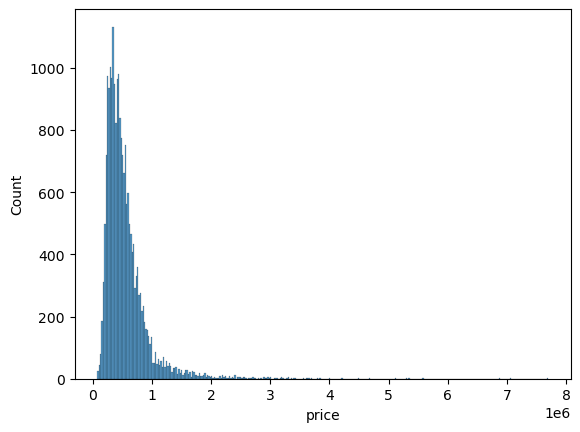

In [469]:
sns.histplot(df['price'])

<Axes: >

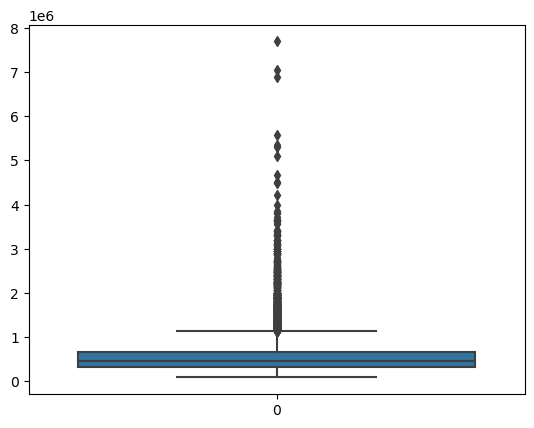

In [470]:
sns.boxplot(df['price'])

In [471]:
data2 =df['price']

In [472]:
def skewness(data2):
    n = len(data2)
    mean = sum(data2) / n
    variance = sum((x - mean) ** 2 for x in data2) / n
    std_dev = math.sqrt(variance)
    
    skewness = sum((x - mean) ** 3 for x in data2) / (n * std_dev ** 3)
    return skewness

In [473]:
print(skewness(data2))

4.023789858140078


In [474]:
print(scipy.stats.skew(df['price']))

4.023789858140135


highly skewed greater than 1

In [475]:
df.drop(df[df['price']>6000000].index, axis=0, inplace=True)


<Axes: >

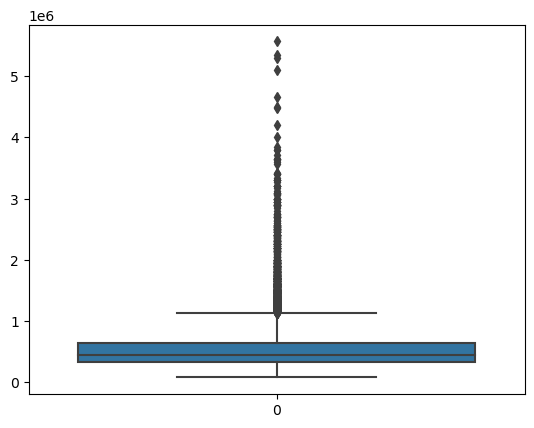

In [476]:
sns.boxplot(df['price'])

<Axes: xlabel='sqft_living', ylabel='Count'>

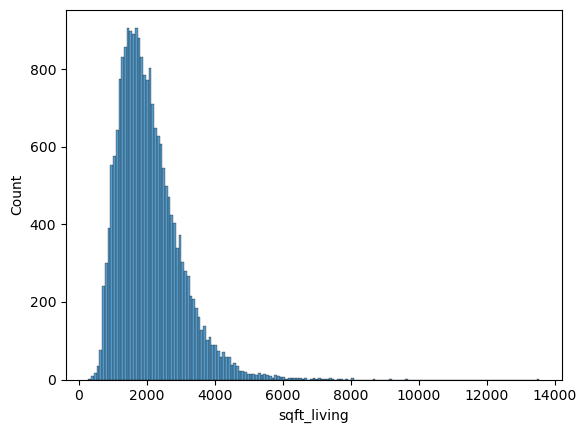

In [477]:
sns.histplot(df['sqft_living'])

<Axes: >

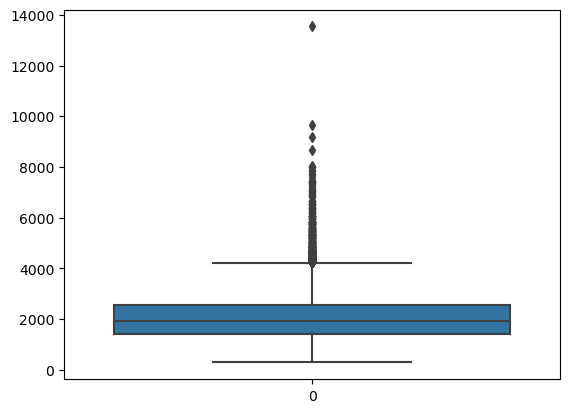

In [478]:
sns.boxplot(df['sqft_living'])

In [479]:
print(scipy.stats.skew(df['sqft_living']))

1.3828176101927758


highly skewed

In [480]:
df.drop(df[df['sqft_living']>12000].index, axis=0, inplace=True)


<Axes: >

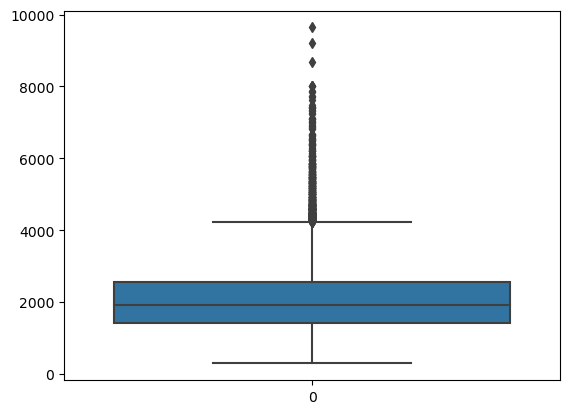

In [481]:
sns.boxplot(df['sqft_living'])

<Axes: xlabel='sqft_lot', ylabel='Count'>

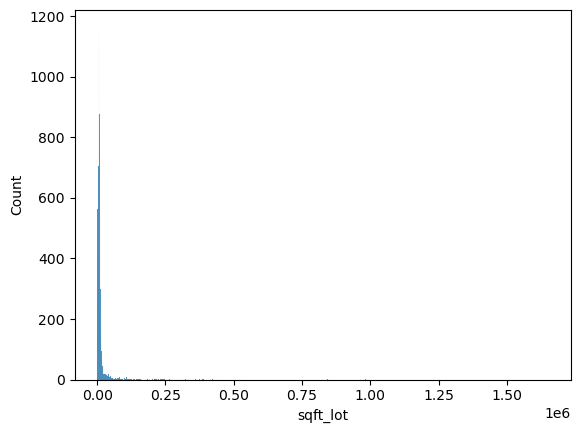

In [482]:
sns.histplot(df['sqft_lot'])

<Axes: >

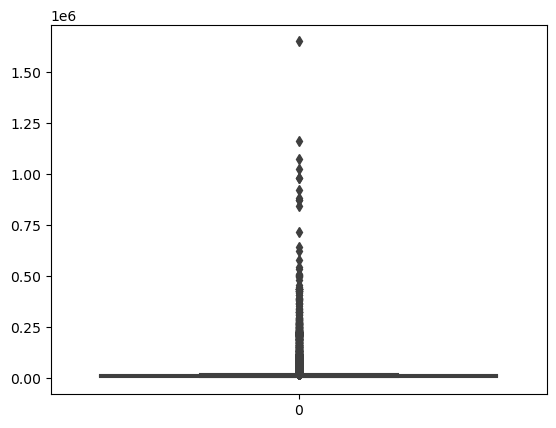

In [483]:
sns.boxplot(df['sqft_lot'])

In [484]:
print(scipy.stats.skew(df['sqft_lot']))
print(scipy.stats.kurtosis(df['sqft_lot'], fisher=True))


13.088530573950436
286.2117957381565


leptokurtic distribution and highly skewed

In [485]:
df.drop(df[df['sqft_lot']>1500000].index, axis=0, inplace=True)


<Axes: >

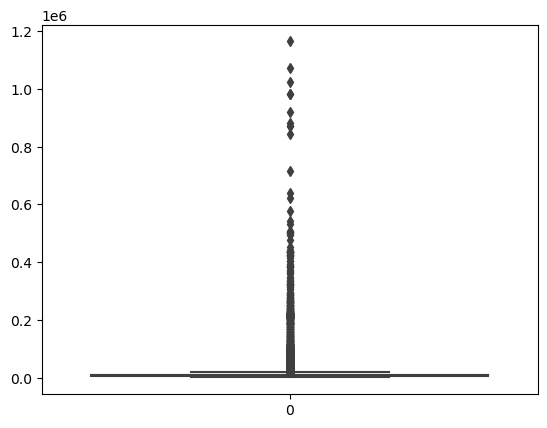

In [486]:
sns.boxplot(df['sqft_lot'])

<Axes: xlabel='sqft_living15', ylabel='Count'>

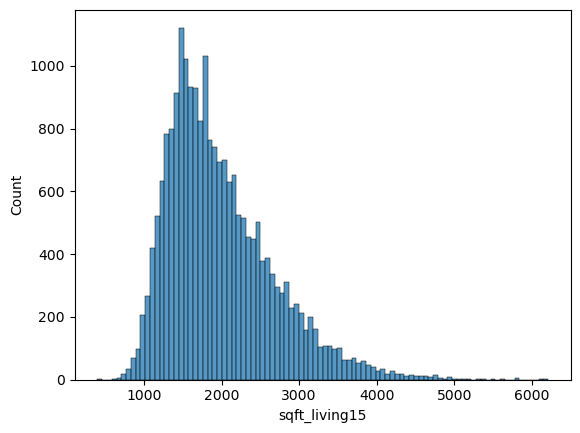

In [487]:
sns.histplot(df['sqft_living15'])

<Axes: >

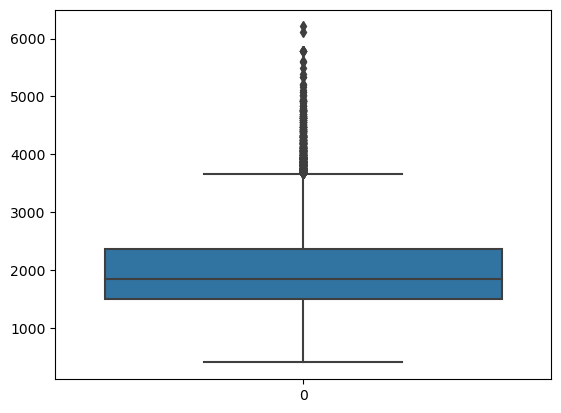

In [488]:
sns.boxplot(df['sqft_living15'])

In [489]:
print(scipy.stats.skew(df['sqft_living15']))

1.1057527557050295


In [490]:
df[df['sqft_living15']>5900]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
10373,3303850390,20141212T000000,2983000.0,5,5.5,7400,18898,2.0,0,3,...,13,6290,1110,2001,0,98006,47.5431,-122.112,6110,26442
19858,2524069078,20150122T000000,2700000.0,4,4.0,7850,89651,2.0,0,0,...,12,7850,0,2006,0,98027,47.5406,-121.982,6210,95832


In [491]:
df.drop(df[df['sqft_living15']>5900].index, axis=0, inplace=True)


<Axes: >

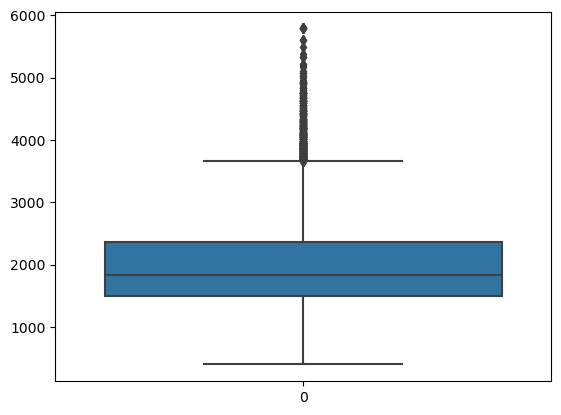

In [492]:
sns.boxplot(df['sqft_living15'])

<Axes: xlabel='sqft_lot15', ylabel='Count'>

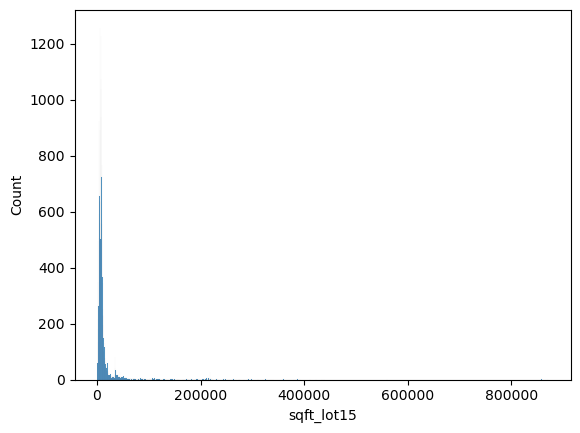

In [493]:
sns.histplot(df['sqft_lot15'])

<Axes: >

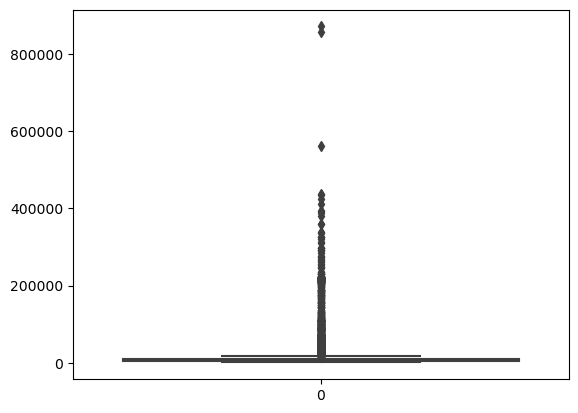

In [494]:
sns.boxplot(df['sqft_lot15'])

In [495]:
print(scipy.stats.skew(df['sqft_lot15']))
print(scipy.stats.kurtosis(df['sqft_lot15'], fisher=True))

9.522398099474579
152.38417533669718


In [496]:
df[df['sqft_lot15']>550000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
9714,225079036,20150107T000000,937500.0,4,4.0,5545,871200,2.0,0,0,...,11,3605,1940,2003,0,98014,47.6760,-121.882,3420,871200
13464,3420069060,20141107T000000,790000.0,3,2.5,2640,432036,1.5,0,3,...,10,2640,0,1996,0,98022,47.1795,-122.036,1500,560617
20452,1125079111,20150415T000000,1600000.0,4,5.5,6530,871200,2.0,0,2,...,11,6530,0,2008,0,98014,47.6640,-121.878,1280,858132


In [497]:
df.drop(df[df['sqft_lot15']>550000].index, axis=0, inplace=True)


<Axes: xlabel='sqft_above', ylabel='Count'>

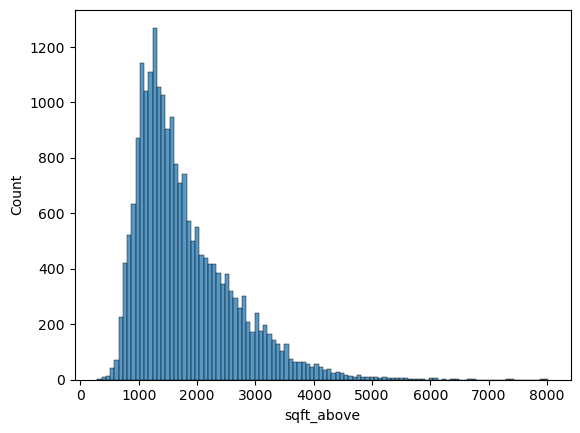

In [498]:
sns.histplot(df['sqft_above'])

<Axes: >

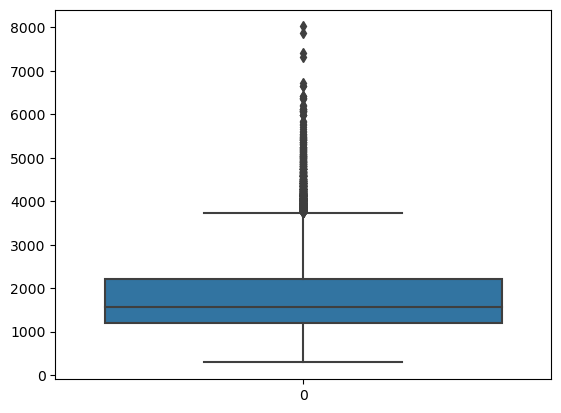

In [499]:
sns.boxplot(df['sqft_above'])

In [500]:
print(scipy.stats.skew(df['sqft_above']))

1.3489273668423865


In [501]:
df.drop(df[df['sqft_above']>7000].index, axis=0, inplace=True)

<Axes: >

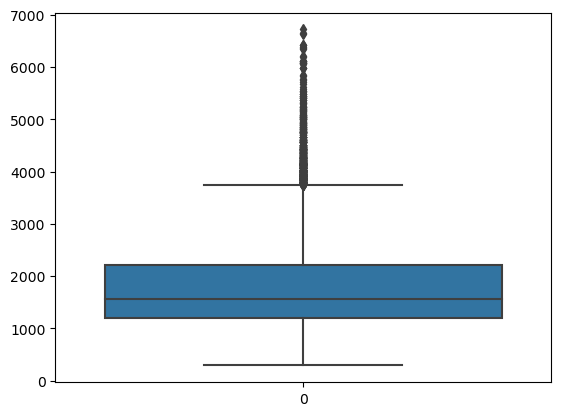

In [502]:
sns.boxplot(df['sqft_above'])

<Axes: xlabel='sqft_basement', ylabel='Count'>

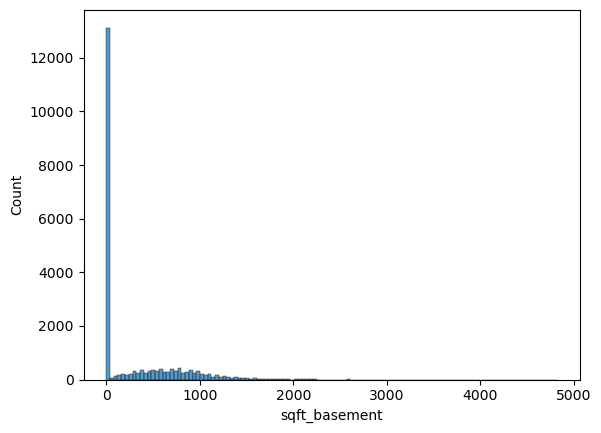

In [503]:
sns.histplot(df['sqft_basement'])

<Axes: >

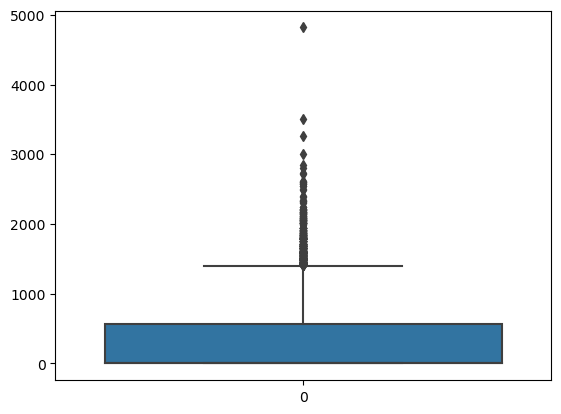

In [504]:
sns.boxplot(df['sqft_basement'])

In [505]:
print(scipy.stats.skew(df['sqft_basement']))
print(scipy.stats.kurtosis(df['sqft_basement'], fisher=True))

1.5439092223379765
2.3847862843231518


In [506]:
df.drop(df[df['sqft_basement']>4000].index, axis=0, inplace=True)

<Axes: >

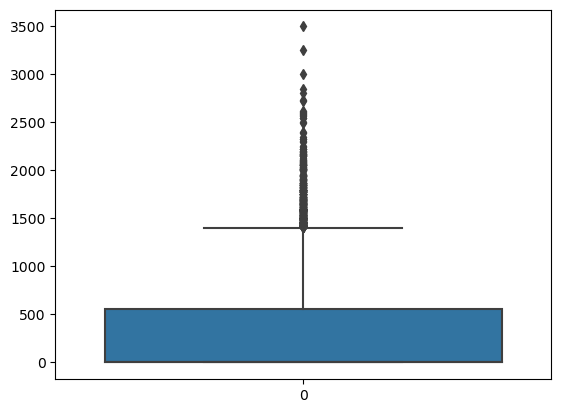

In [507]:
sns.boxplot(df['sqft_basement'])

In [508]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [509]:
df['datetime'] = pd.to_datetime(df['date'])

In [510]:
df.drop(columns=['date'], axis=1, inplace=True)


In [511]:
df['month'] = df['datetime'].dt.month


In [512]:
df['year'] = df['datetime'].dt.year


In [513]:
df['yrs_old']= df['year']-df['yr_built']

In [514]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,datetime,month,year,yrs_old
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,98178,47.5112,-122.257,1340,5650,2014-10-13,10,2014,59
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,1991,98125,47.7210,-122.319,1690,7639,2014-12-09,12,2014,63
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,98028,47.7379,-122.233,2720,8062,2015-02-25,2,2015,82
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,0,98136,47.5208,-122.393,1360,5000,2014-12-09,12,2014,49
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,98074,47.6168,-122.045,1800,7503,2015-02-18,2,2015,28


In [515]:
df['yrs_since_ren']= datetime.now().year-df['yr_renovated']

In [516]:
print(df['yr_renovated'].unique())

[   0 1991 2002 2010 1999 1992 2013 1994 1978 2005 2008 2003 1984 1954
 2014 2011 1974 1983 1945 1990 1988 1957 1977 1981 1995 2000 1998 1970
 1989 2004 1986 2009 2007 1987 1973 2006 1985 2001 1980 1971 1979 1997
 1950 1969 1948 2015 1968 2012 1963 1951 1993 1962 1996 1972 1953 1955
 1982 1956 1940 1976 1946 1975 1958 1964 1959 1960 1967 1965 1934 1944]


to check if anything worked in 2023 otherwise  

In [517]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode,lat,long,sqft_living15,sqft_lot15,datetime,month,year,yrs_old,yrs_since_ren
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,98178,47.5112,-122.257,1340,5650,2014-10-13,10,2014,59,2023
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,98125,47.7210,-122.319,1690,7639,2014-12-09,12,2014,63,32
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,98028,47.7379,-122.233,2720,8062,2015-02-25,2,2015,82,2023
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,98136,47.5208,-122.393,1360,5000,2014-12-09,12,2014,49,2023
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,98074,47.6168,-122.045,1800,7503,2015-02-18,2,2015,28,2023


In [518]:
df['yrs_since_ren'].mask(df['yrs_since_ren']==2023,0,inplace=True)

In [519]:
df['yrs_since_ren'].unique()

array([ 0, 32, 21, 13, 24, 31, 10, 29, 45, 18, 15, 20, 39, 69,  9, 12, 49,
       40, 78, 33, 35, 66, 46, 42, 28, 23, 25, 53, 34, 19, 37, 14, 16, 36,
       50, 17, 38, 22, 43, 52, 44, 26, 73, 54, 75,  8, 55, 11, 60, 72, 30,
       61, 27, 51, 70, 68, 41, 67, 83, 47, 77, 48, 65, 59, 64, 63, 56, 58,
       89, 79], dtype=int64)

In [520]:
def years_reno(x):
    if x >= 0 and x < 5:
        return '0-5'
    elif x >= 5 and x < 10:
        return '5-10'
    elif x >= 10 and x < 15:
        return '10-15'
    elif x >= 15 and x < 20:
        return '15-20'
    elif x >= 20 and x < 25:
        return '20-25'
    elif x >= 25 and x < 30:
        return '25-30'
    else:
        return '30+'

In [521]:
df['rennovation_class'] = df['yrs_since_ren'].apply(years_reno)

In [522]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [523]:
import geopy
from geopy import distance

In [524]:
lat_long = df['lat'].astype(str) + ',' + df['long'].astype(str)
lat_long = list(map(eval, lat_long))
Seattle = (47.6062, -122.3321)
kilometers = []
for i in lat_long:
    kilometers.append(round(distance.distance(i, Seattle).kilometers, 1))
df['distance'] = kilometers

Naturally I assume that the farther away from the city center the more expensive houes get

In [525]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,long,sqft_living15,sqft_lot15,datetime,month,year,yrs_old,yrs_since_ren,rennovation_class,distance
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,-122.257,1340,5650,2014-10-13,10,2014,59,0,0-5,12.0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,-122.319,1690,7639,2014-12-09,12,2014,63,32,30+,12.8
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,-122.233,2720,8062,2015-02-25,2,2015,82,0,0-5,16.4
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,-122.393,1360,5000,2014-12-09,12,2014,49,0,0-5,10.5
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,-122.045,1800,7503,2015-02-18,2,2015,28,0,0-5,21.6


In [526]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode,lat,long,sqft_living15,sqft_lot15,month,year,yrs_old,yrs_since_ren,distance
count,2.159800e+04,2.159800e+04,21598.000000,21598.000000,21598.000000,2.159800e+04,21598.000000,21598.000000,21598.000000,21598.000000,...,21598.000000,21598.000000,21598.000000,21598.000000,21598.000000,21598.0000,21598.000000,21598.000000,21598.000000,21598.000000
mean,4.580663e+09,5.382822e+05,3.369849,2.112719,2075.924067,1.489600e+04,1.494004,0.007454,0.232938,3.409621,...,98077.964812,47.560063,-122.213985,1985.274979,12620.974905,6.5751,2014.322900,43.326697,1.146588,18.475373
std,2.876357e+09,3.557477e+05,0.929263,0.764742,902.698354,3.885441e+04,0.539905,0.086018,0.763849,0.650867,...,53.502702,0.138551,0.140769,682.854028,25564.221344,3.1148,0.467596,29.372224,6.326195,10.649750
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,98001.000000,47.155900,-122.519000,399.000000,651.000000,1.0000,2014.000000,-1.000000,0.000000,1.000000
25%,2.123049e+09,3.211452e+05,3.000000,1.750000,1420.500000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,98033.000000,47.471025,-122.328000,1490.000000,5100.000000,4.0000,2014.000000,18.000000,0.000000,9.800000
50%,3.904935e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.615000e+03,1.500000,0.000000,0.000000,3.000000,...,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,6.0000,2014.000000,40.000000,0.000000,16.500000
75%,7.308900e+09,6.439875e+05,4.000000,2.500000,2550.000000,1.066325e+04,2.000000,0.000000,0.000000,4.000000,...,98118.000000,47.678000,-122.125000,2360.000000,10080.000000,9.0000,2015.000000,63.000000,0.000000,25.300000
max,9.900000e+09,5.570000e+06,33.000000,7.500000,9200.000000,1.164794e+06,3.500000,1.000000,4.000000,5.000000,...,98199.000000,47.777600,-121.315000,5790.000000,438213.000000,12.0000,2015.000000,115.000000,89.000000,77.300000


In [527]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21598 entries, 0 to 21612
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 21598 non-null  int64         
 1   price              21598 non-null  float64       
 2   bedrooms           21598 non-null  int64         
 3   bathrooms          21598 non-null  float64       
 4   sqft_living        21598 non-null  int64         
 5   sqft_lot           21598 non-null  int64         
 6   floors             21598 non-null  float64       
 7   waterfront         21598 non-null  int64         
 8   view               21598 non-null  int64         
 9   condition          21598 non-null  int64         
 10  grade              21598 non-null  int64         
 11  sqft_above         21598 non-null  int64         
 12  sqft_basement      21598 non-null  int64         
 13  yr_built           21598 non-null  int64         
 14  yr_ren

In [528]:
categorical_features = ['waterfront', 'view', 'condition', 'grade', 'rennovation_class', 'datetime', 'month', 'year', 'zipcode' ]
numerical_features = ['distance','bedrooms', 'bathrooms', 'floors', 'sqft_living','sqft_living15', 'sqft_lot', 'sqft_lot15', 'sqft_above', 'sqft_basement', 'yrs_old', 'lat', 'long']
target = 'price'

X_train, X_test, y_train, y_test = train_test_split(df[categorical_features + numerical_features]
                                                    ,df[target],
                                                    test_size = 0.3, random_state=1234)
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps = [('scaler', StandardScaler())])
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, categorical_features),
                                                 ('num', num_transformer, numerical_features)])





In [529]:
linear_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
linear_regression.fit(X_train, y_train)
pred = linear_regression.predict(X_test)
np.sqrt(mean_squared_error(pred,y_test))


147451.32783698704

In [530]:
ols_net_pred = pd.concat([pd.DataFrame(pred).rename(columns={0:'pred'}),y_test.reset_index().drop('index',axis=1).rename(columns={0:'actual'})], axis=1)
ols_net_pred['res'] = ols_net_pred['pred'] - ols_net_pred['price']

((array([-3.70198072, -3.47061865, -3.34329933, ...,  3.34329933,
          3.47061865,  3.70198072]),
  array([-1757003.81547607, -1581758.78216177, -1543076.29308357, ...,
           892520.58480337,   899572.74377566,  1672049.92972881])),
 (131201.2310678882, -826.4822093838619, 0.8893369990315838))

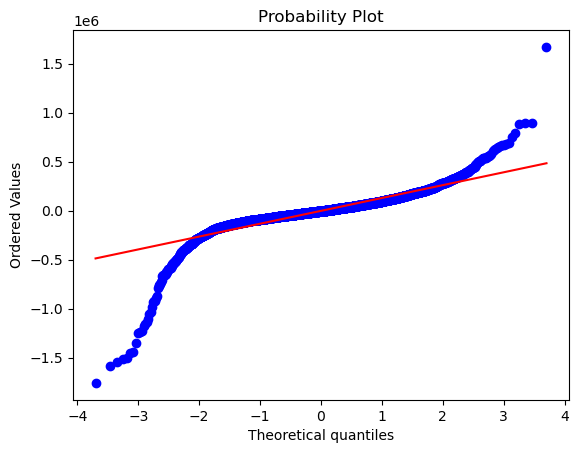

In [531]:
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(ols_net_pred['res'], dist='norm', plot=ax)

In [532]:
lasso_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=1.0))
])
lasso_regression.fit(X_train, y_train)
lasso_pred = lasso_regression.predict(X_test)
np.sqrt(mean_squared_error(lasso_pred, y_test))


c:\Users\Annuj\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30283852915279.22, tolerance: 188504510711.12552
  model = cd_fast.sparse_enet_coordinate_descent(


147399.49287910102

In [533]:
lasso_net_pred = pd.concat([pd.DataFrame(lasso_pred).rename(columns={0:'pred'}),y_test.reset_index().drop('index',axis=1).rename(columns={0:'actual'})], axis=1)
lasso_net_pred['res'] = lasso_net_pred['pred'] - lasso_net_pred['price']

((array([-3.70198072, -3.47061865, -3.34329933, ...,  3.34329933,
          3.47061865,  3.70198072]),
  array([-1760051.97634875, -1582083.53270682, -1544081.73916234, ...,
           892420.44082286,   899598.33629645,  1671185.24245012])),
 (131114.35975917938, -811.2894196221122, 0.8890601894611485))

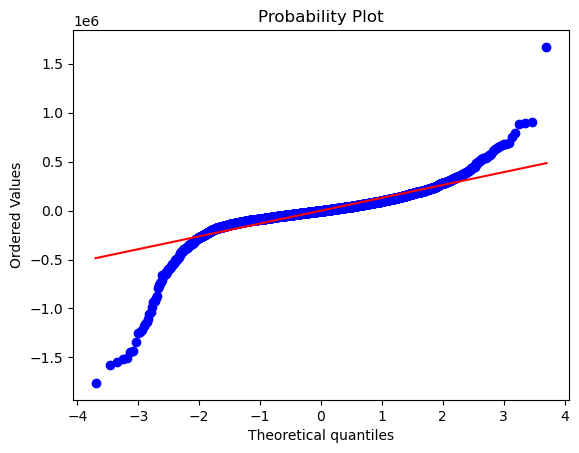

In [534]:
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(lasso_net_pred['res'], dist='norm', plot=ax)

In [535]:
ridge_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=3.0))
])
ridge_regression.fit(X_train, y_train)

pred_ridge = ridge_regression.predict(X_test)

np.sqrt(mean_squared_error(pred_ridge,y_test))

148462.3452169297

In [536]:
ridge_net_pred = pd.concat([pd.DataFrame(pred_ridge).rename(columns={0:'pred'}),y_test.reset_index().drop('index',axis=1).rename(columns={0:'actual'})], axis=1)
ridge_net_pred['res'] = ridge_net_pred['pred'] - ridge_net_pred['price']

((array([-3.70198072, -3.47061865, -3.34329933, ...,  3.34329933,
          3.47061865,  3.70198072]),
  array([-2199348.91405595, -1609829.69612657, -1551486.69479044, ...,
           896745.83825417,   903130.01674367,  1646964.75834185])),
 (131250.37891844712, -764.4342411697463, 0.8836093900332332))

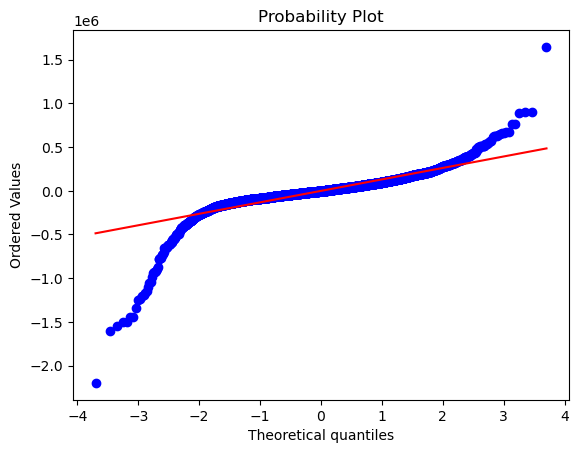

In [537]:
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(ridge_net_pred['res'], dist='norm', plot=ax)

In [538]:

elasticnet_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(alpha=1.0, l1_ratio=0.8))
])
elasticnet_regression.fit(X_train, y_train)

elasticnet_pred = elasticnet_regression.predict(X_test)

np.sqrt(mean_squared_error(elasticnet_pred, y_test))

206995.1779554405

In [539]:
elastic_net_pred = pd.concat([pd.DataFrame(elasticnet_pred).rename(columns={0:'pred'}),y_test.reset_index().drop('index',axis=1).rename(columns={0:'actual'})], axis=1)
elastic_net_pred['res'] = elastic_net_pred['pred'] - elastic_net_pred['price']

((array([-3.70198072, -3.47061865, -3.34329933, ...,  3.34329933,
          3.47061865,  3.70198072]),
  array([-3421750.596789  , -2713822.12064737, -2184933.68532251, ...,
           713648.4571734 ,   913270.72063796,   997440.01574939])),
 (178102.25271160217, -1838.404763535487, 0.8599963921203402))

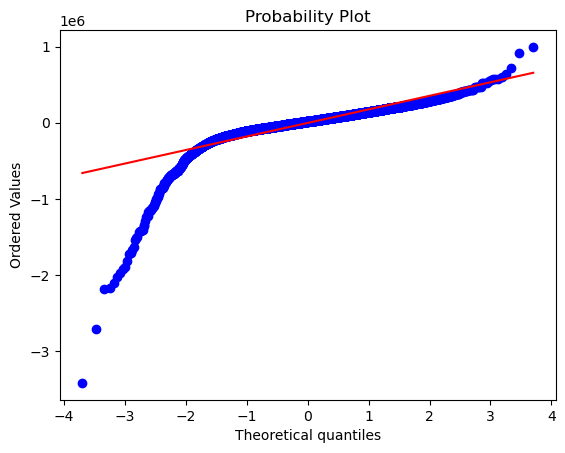

In [540]:
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(elastic_net_pred['res'], dist='norm', plot=ax)

C:\Users\Annuj\AppData\Local\Temp\ipykernel_23688\4276138792.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr().abs()
findfont: Font family 'Silom' not found.
findfont: Font family 'Silom' not found.
findfont: Font family 'Silom' not found.
findfont: Font family 'Silom' not found.
findfont: Font family 'Silom' not found.
findfont: Font family 'Silom' not found.
findfont: Font family 'Silom' not found.


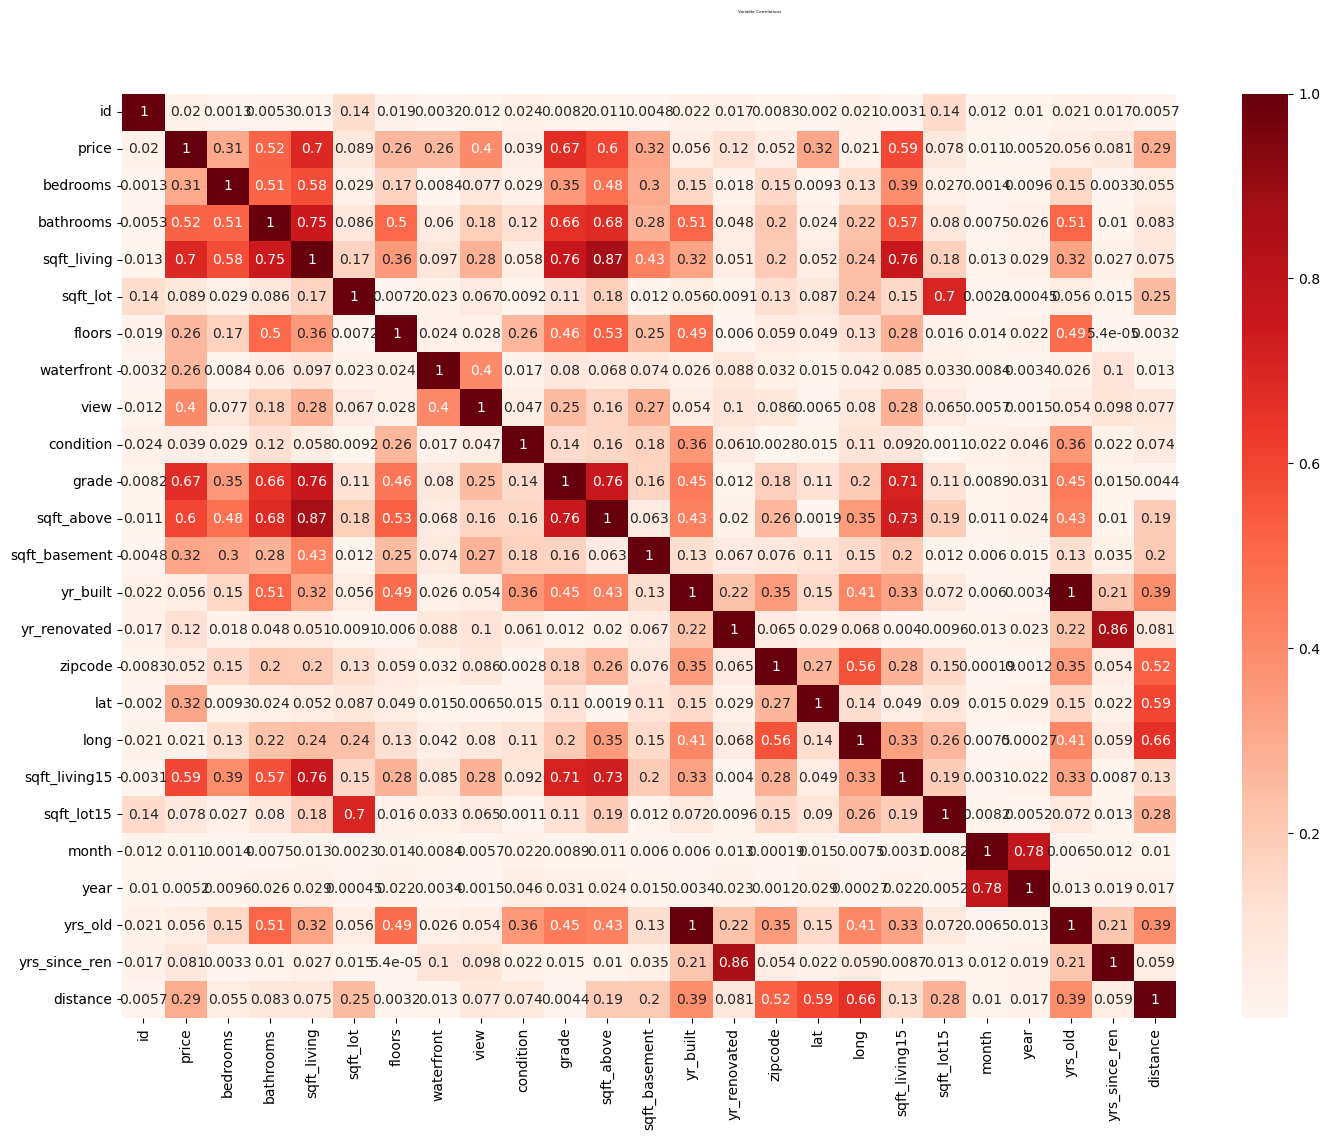

In [541]:
corr = df.corr().abs()
fig, ax=plt.subplots(figsize=(17,12))
fig.suptitle('Variable Correlations', fontsize=3, y=.95, fontname='Silom')
heatmap = sns.heatmap(corr, cmap='Reds', annot=True)

In [542]:
categorical_features = ['waterfront', 'view', 'condition', 'grade', 'rennovation_class', 'year', 'zipcode' ]
numerical_features = ['distance','bedrooms', 'floors', 'sqft_lot', 'sqft_basement', 'yrs_old', ]
target = 'price'

X_train, X_test, y_train, y_test = train_test_split(df[categorical_features + numerical_features]
                                                    ,df[target],
                                                    test_size = 0.3, random_state=1234)
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps = [('scaler', StandardScaler())])
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, categorical_features),
                                                 ('num', num_transformer, numerical_features)])


In [543]:
ridge_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=3.0))
])
ridge_regression.fit(X_train, y_train)

pred_ridge = ridge_regression.predict(X_test)

np.sqrt(mean_squared_error(pred_ridge,y_test))

162977.17757505126

((array([-3.70198072, -3.47061865, -3.34329933, ...,  3.34329933,
          3.47061865,  3.70198072]),
  array([-2199348.91405595, -1609829.69612657, -1551486.69479044, ...,
           896745.83825417,   903130.01674367,  1646964.75834185])),
 (131250.37891844712, -764.4342411697463, 0.8836093900332332))

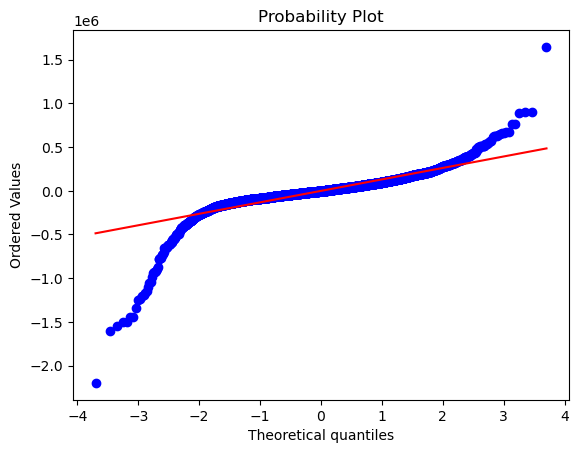

In [544]:
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(ridge_net_pred['res'], dist='norm', plot=ax)

In [549]:
Model_1 = sm.ols(formula="price ~ grade + bathrooms + sqft_living15  + sqft_living", data=df).fit()
Model_1.summary()

AttributeError: module 'statsmodels.api' has no attribute 'ols'